In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
ho_df = pd.read_csv('../all_home_office_clean_wna.csv')


In [48]:
ho_df.head()

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
0,European_Union_27_countries_from_2020,4.5,4.6,4.6,4.7,5.3,10.3,12.4,11.1,10.4,10.0,total,18-24,total
1,Euro_area_20_countries_2015-2022,4.5,4.3,4.6,4.7,5.3,11.1,13.7,12.3,11.0,10.7,total,18-24,total
2,Belgium,8.9,8.6,9.3,9.6,10.3,13.3,16.0,11.9,11.3,11.2,total,18-24,total
3,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,total,18-24,total
4,Czechia,2.7,2.8,3.5,3.9,4.3,4.8,7.3,6.5,10.2,8.4,total,18-24,total


In [49]:
np.sort(ho_df['children'].unique())

array(['0', '1', '2', '3+', 'total'], dtype=object)

In [4]:
ho_df.isnull().sum()

region         0
2015         931
2016         903
2017         863
2018         863
2019         823
2020         906
2021         751
2022         786
2023         797
2024         904
gender         0
age_group      0
children       0
dtype: int64

In [5]:
ho_df['children'].isnull().sum()

np.int64(0)

In [6]:
ho_df = ho_df.dropna(subset=['children'])

In [7]:
ho_df = ho_df[~ho_df["age_group"].isin(["18-64", "18+"])]

In [8]:
np.sort(ho_df['age_group'].unique())

array(['18-24', '20-49', '25-49', '25-54', '55+'], dtype=object)

In [9]:
ho_df = ho_df[ho_df["children"] != "total"]


In [10]:
ho_df = ho_df[ho_df["gender"] != "total"]

In [11]:
np.sort(ho_df['children'].unique())

array(['0', '1', '2', '3+'], dtype=object)

In [12]:
ho_df.head()

,region,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gender,age_group,children
1296,European_Union_27_countries_from_2020,5.1,5.0,5.0,5.1,6.0,10.9,12.8,11.4,11.2,10.9,male,18-24,0
1297,Euro_area_20_countries_2015-2022,5.0,4.6,4.9,4.9,5.7,11.6,14.0,12.6,11.9,11.6,male,18-24,0
1298,Belgium,8.5,6.2,8.6,8.3,8.5,13.9,18.3,14.3,11.7,10.4,male,18-24,0
1299,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,18-24,0
1300,Czechia,1.9,3.8,3.4,5.8,4.8,4.7,8.6,7.3,11.8,8.2,male,18-24,0


In [13]:
summary = ho_df.groupby(['age_group', 'children']).size().reset_index(name='count')
print(summary)


   age_group children  count
0      18-24        0     72
1      18-24        1     72
2      18-24        2     72
3      18-24       3+     72
4      20-49        0     72
5      20-49        1     72
6      20-49        2     72
7      20-49       3+     72
8      25-49        0     72
9      25-49        1     72
10     25-49        2     72
11     25-49       3+     72
12     25-54        0     72
13     25-54        1     72
14     25-54        2     72
15     25-54       3+     72
16       55+        0     72
17       55+        1     72
18       55+        2     72
19       55+       3+     72


In [14]:
year_cols = ho_df.columns[1:11]

ho_df_long = ho_df.melt(
    id_vars=["region", "gender", "age_group", "children"],
    value_vars=year_cols,
    var_name="year",
    value_name="percent_home_office"
)

In [15]:
ho_df_long.head()

,region,gender,age_group,children,year,percent_home_office
0,European_Union_27_countries_from_2020,male,18-24,0,2015,5.1
1,Euro_area_20_countries_2015-2022,male,18-24,0,2015,5.0
2,Belgium,male,18-24,0,2015,8.5
3,Bulgaria,male,18-24,0,2015,NaN
4,Czechia,male,18-24,0,2015,1.9


In [16]:


# Filter for EU27 only
eu_df = ho_df_long[ho_df_long['region'] == 'European_Union_27_countries_from_2020']

# Ensure children is a string for grouping/legend
eu_df['children'] = eu_df['children'].astype(str).str.strip()


C:\Users\david\AppData\Local\Temp\ipykernel_16668\1974373586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_df['children'] = eu_df['children'].astype(str).str.strip()


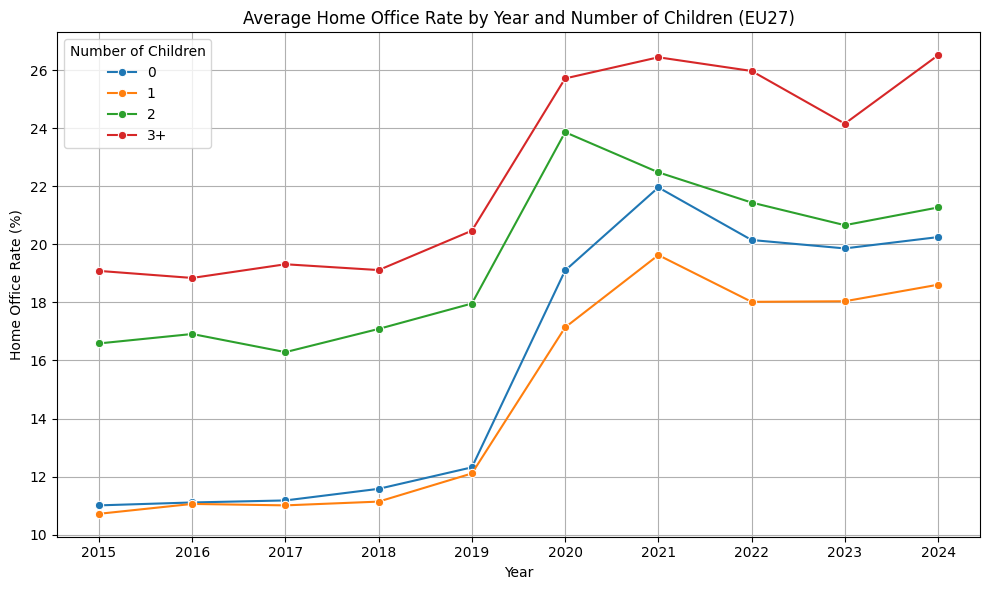

In [17]:
#  home office rates by year and number of children
home_office_summary = (
    eu_df.groupby(['year', 'children'])['percent_home_office']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(
    data=home_office_summary,
    x='year',
    y='percent_home_office',
    hue='children',
    marker='o'
)

plt.title('Average Home Office Rate by Year and Number of Children (EU27)')
plt.ylabel('Home Office Rate (%)')
plt.xlabel('Year')
plt.legend(title='Number of Children')
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
# home office rates by number of children and age group


ho_df_long['children'] = ho_df_long['children'].astype(str).str.strip()
ho_df_long['age_group'] = ho_df_long['age_group'].astype(str).str.strip()

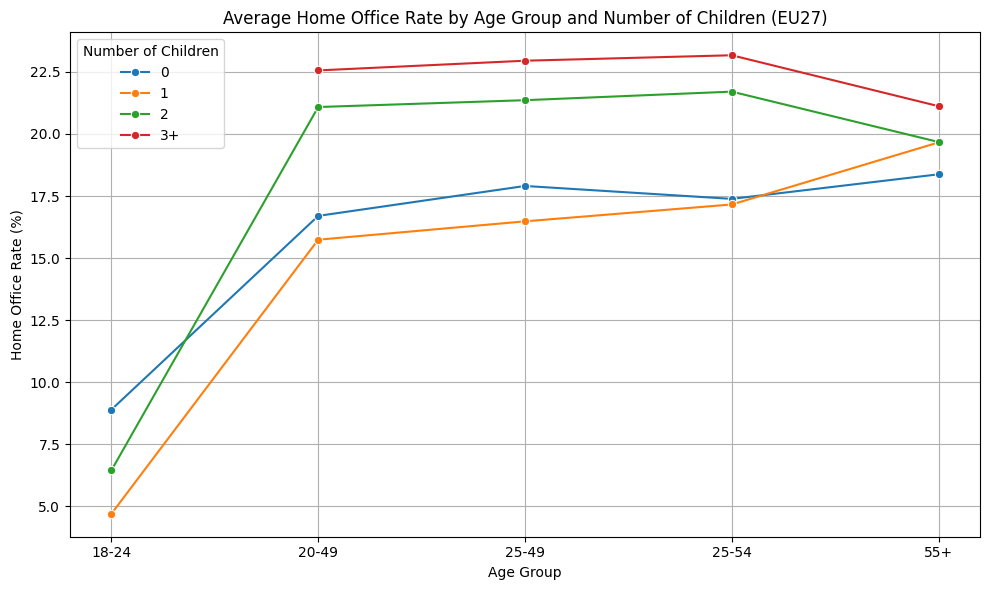

In [87]:
# only for eu 27
eu_df = ho_df_long[ho_df_long['region'] == 'European_Union_27_countries_from_2020']

home_office_summary = (
    eu_df.groupby(['age_group', 'children'])['percent_home_office']
    .mean()
    .reset_index()
)

# Plot 
plt.figure(figsize=(10,6))
sns.lineplot(
    data=home_office_summary,
    x='age_group',
    y='percent_home_office',
    hue='children',
    marker='o'
)

plt.title('Average Home Office Rate by Age Group and Number of Children (EU27)')
plt.ylabel('Home Office Rate (%)')
plt.xlabel('Age Group')
plt.legend(title='Number of Children')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:


# ho rates by gender, year and n of children
ho_df_long['children'] = ho_df_long['children'].astype(str).str.strip()
ho_df_long['gender'] = ho_df_long['gender'].astype(str).str.strip()

# EU27 only
eu_df = ho_df_long[ho_df_long['region'] == 'European_Union_27_countries_from_2020']

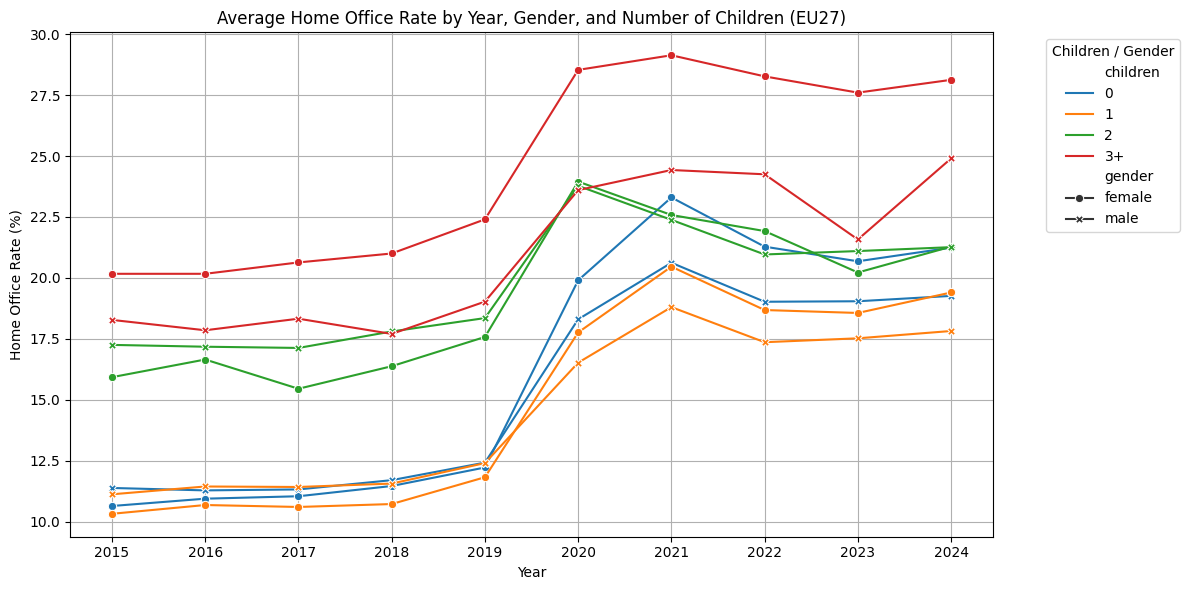

In [89]:
# Group by year, gender, and children, calculate mean home office rate
home_office_summary = (
    eu_df.groupby(['year', 'gender', 'children'])['percent_home_office']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=home_office_summary,
    x='year',
    y='percent_home_office',
    hue='children',  
    style='gender',  
    markers=True,
    dashes=False
)

plt.title('Average Home Office Rate by Year, Gender, and Number of Children (EU27)')
plt.ylabel('Home Office Rate (%)')
plt.xlabel('Year')
plt.legend(title='Children / Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
#cluster


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
df_ho_cluster = ho_df_long[~ho_df_long["region"].isin(['European_Union_27_countries_from_2020', "Euro_area_20_countries_2015-2022"])]
df_ho_cluster.groupby("region")
df_ho_cluster

,region,gender,age_group,children,year,percent_home_office
2,Belgium,male,18-24,0,2015,8.5
3,Bulgaria,male,18-24,0,2015,NaN
4,Czechia,male,18-24,0,2015,1.9
5,Denmark,male,18-24,0,2015,7.5
6,Germany,male,18-24,0,2015,3.3
...,...,...,...,...,...,...
14395,Bosnia and Herzegovina,female,55+,3+,2024,NaN
14396,Montenegro,female,55+,3+,2024,NaN
14397,North Macedonia,female,55+,3+,2024,NaN
14398,Serbia,female,55+,3+,2024,NaN


In [23]:
df_cluster = pd.read_csv('../data/data_home_office_cluster_202508140903.csv')

In [25]:
df_cluster.head()

,index,region,cluster,gender,year,percentage
0,0,Belgium,2,male,2015,7.9
1,1,Bulgaria,0,male,2015,0.0
2,2,Czechia,0,male,2015,1.9
3,3,Denmark,2,male,2015,6.7
4,4,Germany,1,male,2015,2.9


In [26]:
df_ho_cluster.head()

,region,gender,age_group,children,year,percent_home_office
2,Belgium,male,18-24,0,2015,8.5
3,Bulgaria,male,18-24,0,2015,NaN
4,Czechia,male,18-24,0,2015,1.9
5,Denmark,male,18-24,0,2015,7.5
6,Germany,male,18-24,0,2015,3.3


In [27]:
df_ho_cluster= df_ho_cluster.rename(columns={"percent_home_office" :'percentage'})


In [30]:


df_cluster['year'] = df_cluster['year'].astype(int)
df_ho_cluster['year'] = df_ho_cluster['year'].astype(int)

df_children_cluster = pd.merge(
    df_cluster,
    df_ho_cluster,
    on=['region', 'gender', 'year'],
    how='left'
)



In [31]:
df_children_cluster.head()

,index,region,cluster,gender,year,percentage_x,age_group,children,percentage_y
0,0,Belgium,2,male,2015,7.9,18-24,0,8.5
1,0,Belgium,2,male,2015,7.9,18-24,1,NaN
2,0,Belgium,2,male,2015,7.9,18-24,2,NaN
3,0,Belgium,2,male,2015,7.9,18-24,3+,NaN
4,0,Belgium,2,male,2015,7.9,20-49,0,18.3


In [ ]:
df_children_cluster = df_children_cluster.drop(columns=['percentage_x'])

In [33]:
df_children_cluster.head()

,index,region,cluster,gender,year,age_group,children,percentage_y
0,0,Belgium,2,male,2015,18-24,0,8.5
1,0,Belgium,2,male,2015,18-24,1,NaN
2,0,Belgium,2,male,2015,18-24,2,NaN
3,0,Belgium,2,male,2015,18-24,3+,NaN
4,0,Belgium,2,male,2015,20-49,0,18.3


In [35]:
df_children_cluster = df_children_cluster.drop(columns=['age_group'])

In [36]:
df_children_cluster.head()

,index,region,cluster,gender,year,children,percentage_y
0,0,Belgium,2,male,2015,0,8.5
1,0,Belgium,2,male,2015,1,NaN
2,0,Belgium,2,male,2015,2,NaN
3,0,Belgium,2,male,2015,3+,NaN
4,0,Belgium,2,male,2015,0,18.3


In [37]:
df_children_cluster = df_children_cluster.fillna(0)


In [38]:
df_children_cluster.head()

,index,region,cluster,gender,year,children,percentage_y
0,0,Belgium,2,male,2015,0,8.5
1,0,Belgium,2,male,2015,1,0.0
2,0,Belgium,2,male,2015,2,0.0
3,0,Belgium,2,male,2015,3+,0.0
4,0,Belgium,2,male,2015,0,18.3


In [39]:
# Save DataFrame to CSV
df_children_cluster.to_csv('data_children_cluster.csv', index=False)
